## Company-Data

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

In [37]:
df=pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [38]:
df.shape

(400, 11)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [40]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [41]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [42]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [43]:
df[df.duplicated]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [44]:
enc = OneHotEncoder(handle_unknown='ignore')

In [45]:
enc_df = pd.DataFrame(enc.fit_transform(df[['ShelveLoc','Urban','US']]).toarray())
enc_df

,0,1,2,3,4,5,6
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...
395,0.0,1.0,0.0,0.0,1.0,0.0,1.0
396,0.0,0.0,1.0,1.0,0.0,0.0,1.0
397,0.0,0.0,1.0,0.0,1.0,0.0,1.0
398,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [46]:
data_final = df.iloc[:,0:6].join([df['Age']]).join(enc_df)
data_final

,Sales,CompPrice,Income,Advertising,Population,Price,Age,0,1,2,3,4,5,6
0,9.50,138,73,11,276,120,42,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,11.22,111,48,16,260,83,65,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,10.06,113,35,10,269,80,59,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,7.40,117,100,4,466,97,55,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,4.15,141,64,3,340,128,38,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,0.0,1.0,0.0,0.0,1.0,0.0,1.0
396,6.14,139,23,3,37,120,55,0.0,0.0,1.0,1.0,0.0,0.0,1.0
397,7.41,162,26,12,368,159,40,0.0,0.0,1.0,0.0,1.0,0.0,1.0
398,5.94,100,79,7,284,95,50,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [47]:
from sklearn.ensemble import IsolationForest

In [48]:
clf=IsolationForest(contamination=0.05)
clf.fit(enc_df)

IsolationForest(contamination=0.05)

In [49]:
y_pred_outliers = clf.predict(enc_df)
y_pred_outliers

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [50]:
data_final['scores']=clf.decision_function(enc_df)
data_final

,Sales,CompPrice,Income,Advertising,Population,Price,Age,0,1,2,3,4,5,6,scores
0,9.50,138,73,11,276,120,42,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.115785
1,11.22,111,48,16,260,83,65,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.099806
2,10.06,113,35,10,269,80,59,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.162021
3,7.40,117,100,4,466,97,55,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.162021
4,4.15,141,64,3,340,128,38,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.059351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.099806
396,6.14,139,23,3,37,120,55,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.102069
397,7.41,162,26,12,368,159,40,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.162021
398,5.94,100,79,7,284,95,50,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.115785


In [51]:
data_final['scores']=clf.decision_function(enc_df)

In [52]:
data_final['anomaly']=clf.predict(enc_df.iloc[:,0:14])
data_final

,Sales,CompPrice,Income,Advertising,Population,Price,Age,0,1,2,3,4,5,6,scores,anomaly
0,9.50,138,73,11,276,120,42,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.115785,1
1,11.22,111,48,16,260,83,65,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.099806,1
2,10.06,113,35,10,269,80,59,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.162021,1
3,7.40,117,100,4,466,97,55,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.162021,1
4,4.15,141,64,3,340,128,38,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.059351,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.099806,1
396,6.14,139,23,3,37,120,55,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.102069,1
397,7.41,162,26,12,368,159,40,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.162021,1
398,5.94,100,79,7,284,95,50,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.115785,1


In [53]:
data_final[data_final['anomaly']==-1]  

,Sales,CompPrice,Income,Advertising,Population,Price,Age,0,1,2,3,4,5,6,scores,anomaly
5,10.81,124,113,13,501,72,78,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.001723,-1
10,9.01,121,78,9,150,100,26,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.001723,-1
25,14.90,139,32,0,176,82,54,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.060304,-1
36,8.89,122,76,0,270,100,60,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.060304,-1
75,8.55,88,111,23,480,92,36,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.001723,-1
99,4.88,121,47,3,220,107,56,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.001723,-1
129,4.47,143,120,7,279,147,40,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.001723,-1
144,9.09,132,68,0,264,123,34,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.060304,-1
152,7.64,128,78,0,341,128,45,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.060304,-1
202,4.10,121,78,4,413,130,46,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.001723,-1


In [54]:
data_final.drop(data_final[data_final['anomaly']==-1].index,inplace=True)
data_final

,Sales,CompPrice,Income,Advertising,Population,Price,Age,0,1,2,3,4,5,6,scores,anomaly
0,9.50,138,73,11,276,120,42,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.115785,1
1,11.22,111,48,16,260,83,65,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.099806,1
2,10.06,113,35,10,269,80,59,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.162021,1
3,7.40,117,100,4,466,97,55,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.162021,1
4,4.15,141,64,3,340,128,38,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.059351,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.099806,1
396,6.14,139,23,3,37,120,55,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.102069,1
397,7.41,162,26,12,368,159,40,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.162021,1
398,5.94,100,79,7,284,95,50,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.115785,1


In [55]:
Data_2=data_final.iloc[: ,0:14]

In [56]:
Data_2.shape

(383, 14)

In [57]:
x=Data_2.values[:,1:14]
y=Data_2.values[:,0]

In [58]:
x

array([[138.,  73.,  11., ...,   1.,   0.,   1.],
       [111.,  48.,  16., ...,   1.,   0.,   1.],
       [113.,  35.,  10., ...,   1.,   0.,   1.],
       ...,
       [162.,  26.,  12., ...,   1.,   0.,   1.],
       [100.,  79.,   7., ...,   1.,   0.,   1.],
       [134.,  37.,   0., ...,   1.,   0.,   1.]])

In [59]:
y

array([ 9.5 , 11.22, 10.06,  7.4 ,  4.15,  6.63, 11.85,  6.54,  4.69,
       11.96,  3.98, 10.96, 11.17,  8.71,  7.58, 12.29, 13.91,  8.73,
        6.41, 12.13,  5.08,  5.87, 10.14,  8.33,  5.27,  2.99,  7.81,
       13.55,  8.25,  6.2 ,  8.77,  2.67, 11.07,  4.95,  6.59,  3.24,
        2.07,  7.96, 10.43,  4.12,  4.16,  4.56, 12.44,  4.38,  3.91,
       10.61,  1.42,  4.42,  7.91,  6.92,  4.9 ,  6.85, 11.91,  0.91,
        5.42,  5.21,  8.32,  7.32,  1.82,  8.47,  7.8 ,  4.9 ,  8.85,
        9.01, 13.39,  7.99,  9.46,  6.5 ,  5.52, 12.61,  6.2 , 10.64,
        7.7 ,  4.43,  9.14,  8.01,  7.52, 11.62,  4.42,  2.23,  8.47,
        8.7 , 11.7 ,  6.56,  7.95,  5.33,  4.81,  4.53,  8.86,  8.39,
        5.58,  9.48,  7.45, 12.49,  4.11,  6.2 ,  5.3 ,  5.07,  4.62,
        5.55,  0.16,  8.55,  3.47,  8.98,  9.  ,  6.62,  6.67,  6.01,
        9.31,  8.54,  5.08,  8.8 ,  7.57,  7.37,  6.87, 11.67,  6.88,
        8.19,  8.87,  9.34, 11.27,  6.52,  4.96,  8.41,  6.5 ,  9.54,
        7.62,  3.67,

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=0)

In [61]:
from sklearn.tree import DecisionTreeRegressor

In [62]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

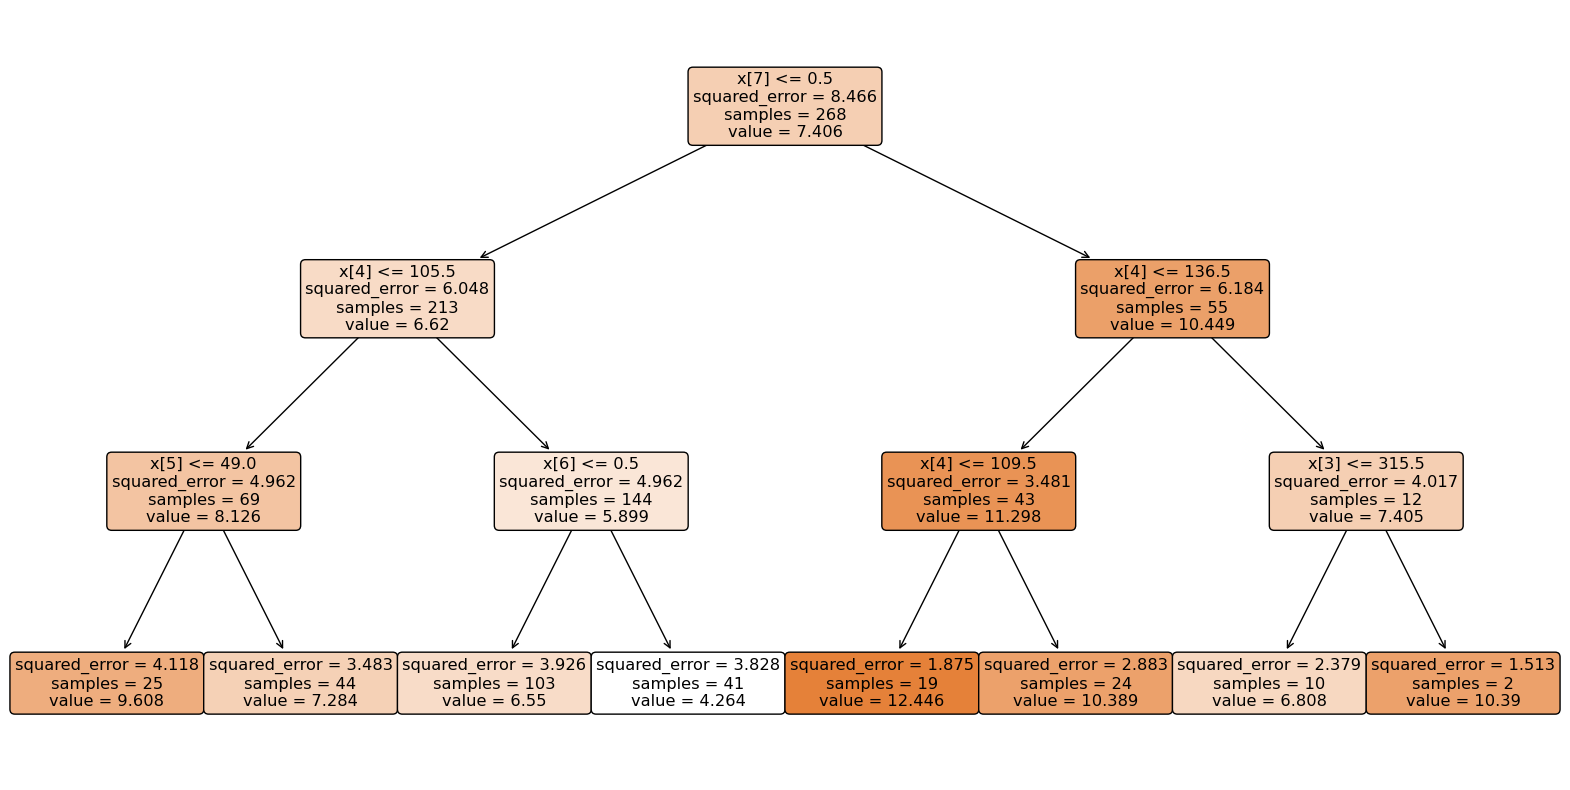

In [63]:
plt.figure(figsize=(20,10))
plot_tree(model,filled=True,rounded=True);

In [64]:
preds = model.predict(x_test)

In [65]:
preds

array([ 9.6084    ,  7.28363636,  6.54980583,  7.28363636, 10.39      ,
        4.26439024,  4.26439024,  6.54980583, 12.44631579,  7.28363636,
        6.54980583,  6.54980583, 10.38916667,  9.6084    ,  6.54980583,
        7.28363636,  7.28363636,  6.54980583,  6.54980583, 10.38916667,
       12.44631579,  4.26439024,  6.54980583,  6.54980583,  7.28363636,
        4.26439024,  6.54980583, 10.38916667,  9.6084    ,  7.28363636,
        9.6084    ,  7.28363636,  4.26439024, 10.38916667, 12.44631579,
       12.44631579,  6.808     ,  9.6084    , 10.38916667,  9.6084    ,
        4.26439024,  6.54980583,  6.54980583,  7.28363636, 10.38916667,
        7.28363636,  7.28363636,  9.6084    ,  9.6084    , 10.38916667,
        7.28363636,  6.54980583,  6.54980583,  9.6084    ,  7.28363636,
        6.54980583,  6.54980583,  6.54980583,  7.28363636, 12.44631579,
        6.54980583,  6.54980583,  6.54980583, 10.38916667,  4.26439024,
        6.54980583, 10.38916667,  4.26439024,  7.28363636, 10.38

In [66]:
model.score(x_test,y_test)

0.2472877901883319

# Fraud Check

In [201]:
from sklearn.tree import DecisionTreeRegressor

In [202]:
data1=pd.read_csv('Fraud_Check.csv')
data1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [203]:
data1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [204]:
data1.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [205]:
data1[data1.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [206]:
data1.shape

(600, 6)

In [207]:
data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [1]:
sns.pairplot(data=data1,hue='Taxable.Income')

NameError: name 'sns' is not defined

In [209]:
fraud=data1.drop(['Undergrad','Marital.Status','Urban'],axis=1)
fraud

,Taxable.Income,City.Population,Work.Experience
0,68833,50047,10
1,33700,134075,18
2,36925,160205,30
3,50190,193264,15
4,81002,27533,28
...,...,...,...
595,76340,39492,7
596,69967,55369,2
597,47334,154058,0
598,98592,180083,17


In [210]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [211]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [212]:
fraud.isnull().sum()

Taxable.Income     0
City.Population    0
Work.Experience    0
dtype: int64

In [213]:
new_data=pd.DataFrame(data1)

In [214]:
new_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [215]:
data3=new_data.rename(columns={'Marital.Status':'MartialStatus','Taxable.Income':'TaxableIncome','City.Population':'CityPopulation','Work.Experience':'WorkExperience'},inplace=True)

In [216]:
new_data

,Undergrad,MartialStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [217]:
new_data['Tax_Status']=np.where(new_data['TaxableIncome']<=30000,'Risky','Good')

In [218]:
new_data.head()

,Undergrad,MartialStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,Tax_Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [219]:
new_data.Tax_Status.unique()

array(['Good', 'Risky'], dtype=object)

In [220]:
new_data.drop(['TaxableIncome','CityPopulation'],axis=1,inplace=True)

In [221]:
new_data

,Undergrad,MartialStatus,WorkExperience,Urban,Tax_Status
0,NO,Single,10,YES,Good
1,YES,Divorced,18,YES,Good
2,NO,Married,30,YES,Good
3,YES,Single,15,YES,Good
4,NO,Married,28,NO,Good
...,...,...,...,...,...
595,YES,Divorced,7,YES,Good
596,YES,Divorced,2,YES,Good
597,NO,Divorced,0,YES,Good
598,YES,Married,17,NO,Good


In [222]:
from sklearn.preprocessing import LabelEncoder

In [223]:
label=LabelEncoder()

In [224]:
new_data['Undergrad']=label.fit_transform(new_data['Undergrad'])
new_data['MartialStatus']=label.fit_transform(new_data['MartialStatus'])
new_data['Urban']=label.fit_transform(new_data['Urban'])

In [225]:
new_data.head()

,Undergrad,MartialStatus,WorkExperience,Urban,Tax_Status
0,0,2,10,1,Good
1,1,0,18,1,Good
2,0,1,30,1,Good
3,1,2,15,1,Good
4,0,1,28,0,Good


In [226]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Undergrad       600 non-null    int32 
 1   MartialStatus   600 non-null    int32 
 2   WorkExperience  600 non-null    int64 
 3   Urban           600 non-null    int32 
 4   Tax_Status      600 non-null    object
dtypes: int32(3), int64(1), object(1)
memory usage: 16.5+ KB


In [227]:
X=new_data.iloc[:,:4]
X

,Undergrad,MartialStatus,WorkExperience,Urban
0,0,2,10,1
1,1,0,18,1
2,0,1,30,1
3,1,2,15,1
4,0,1,28,0
...,...,...,...,...
595,1,0,7,1
596,1,0,2,1
597,0,0,0,1
598,1,1,17,0


In [228]:
Y=new_data.iloc[:,-1]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Tax_Status, Length: 600, dtype: object

In [229]:
new_data.Tax_Status.value_counts()

Tax_Status
Good     476
Risky    124
Name: count, dtype: int64

In [230]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [231]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [232]:
model.get_n_leaves()

7

In [233]:
y_pred=model.predict(x_test)
pd.Series(y_pred).value_counts()

Good    120
Name: count, dtype: int64

In [234]:
np.mean(y_pred==y_test)

0.7666666666666667

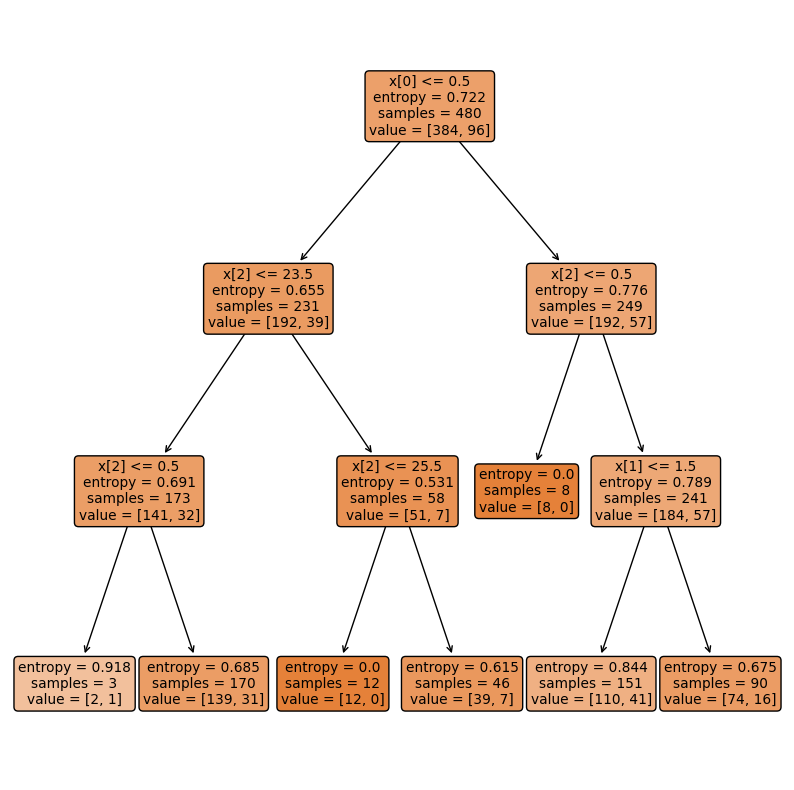

In [235]:
plt.figure(figsize=(10,10))
plot_tree(model,filled=True,rounded=True);

In [236]:
pd.crosstab(y_test,y_pred)

col_0,Good
Tax_Status,
Good,92
Risky,28


In [237]:
import warnings
warnings.filterwarnings("ignore")
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        Good       1.00      0.77      0.87       120
       Risky       0.00      0.00      0.00         0

    accuracy                           0.77       120
   macro avg       0.50      0.38      0.43       120
weighted avg       1.00      0.77      0.87       120



In [238]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [239]:
model_gini.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=3)

In [240]:
y_pred=model_gini.predict(x_test)
np.mean(y_pred==y_test)

0.8

In [241]:
model_gini.get_n_leaves()

8

In [242]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

        Good       0.96      0.81      0.88       108
       Risky       0.29      0.67      0.40        12

    accuracy                           0.80       120
   macro avg       0.62      0.74      0.64       120
weighted avg       0.89      0.80      0.83       120



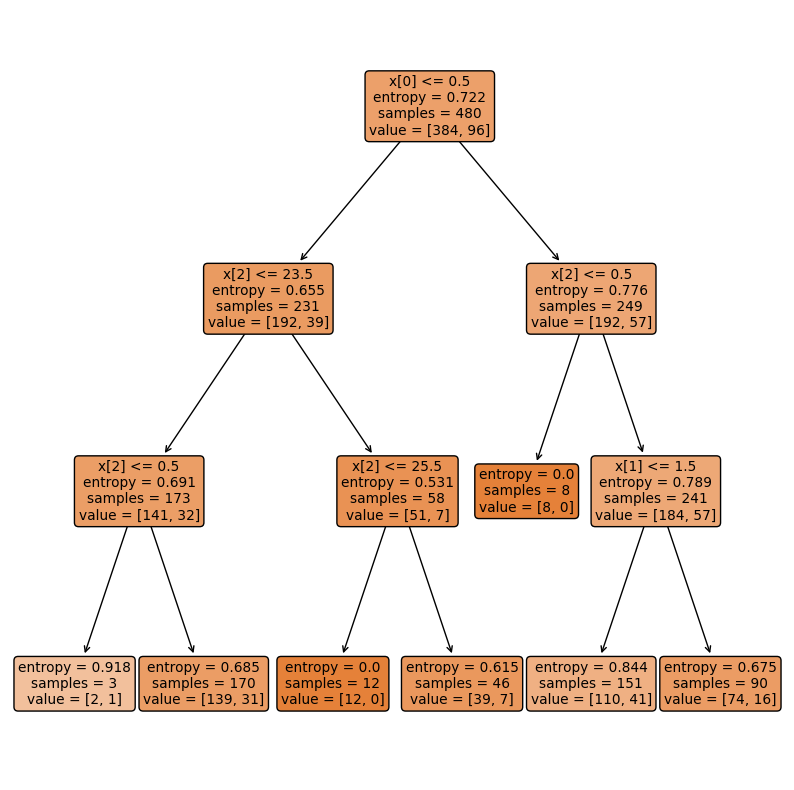

In [243]:
plt.figure(figsize=(10,10))
plot_tree(model,filled=True,rounded=True);

In [244]:
print(tree.export_text(model_gini))

|--- feature_0 <= 0.50
|   |--- feature_1 <= 1.50
|   |   |--- feature_2 <= 24.50
|   |   |   |--- class: Good
|   |   |--- feature_2 >  24.50
|   |   |   |--- class: Good
|   |--- feature_1 >  1.50
|   |   |--- feature_2 <= 10.50
|   |   |   |--- class: Good
|   |   |--- feature_2 >  10.50
|   |   |   |--- class: Risky
|--- feature_0 >  0.50
|   |--- feature_2 <= 8.50
|   |   |--- feature_2 <= 7.00
|   |   |   |--- class: Good
|   |   |--- feature_2 >  7.00
|   |   |   |--- class: Risky
|   |--- feature_2 >  8.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- class: Good
|   |   |--- feature_1 >  1.50
|   |   |   |--- class: Good



In [245]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5]}

In [246]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [247]:
grid_search=GridSearchCV(model_gini,params,verbose=2)

In [248]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, 

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=2)

In [249]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 1, 'splitter': 'best'}

In [250]:
array=data2.values
x=array[:,0:3]
y=array[:,3]

In [251]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=40)

In [252]:
model=DecisionTreeRegressor()

In [253]:
model

DecisionTreeRegressor()